**以下介绍numpy的进阶操作，包括（线性代数，广播）**

**线性代数**

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math

**点积与矩阵乘法**

In [9]:
#元素逐位相乘
arr1=np.arange(5)
arr2=np.arange(5)


In [3]:
arr1*arr2

array([ 0,  1,  4,  9, 16])

In [12]:
#二维的情况
arr3=np.array([[1,2,3],[4,5,6]])
arr4=np.array([[2,2,2],[3,3,3]])
arr5=np.array([[2,2],[3,3],[4,4]])

In [13]:
arr3*arr4

array([[ 2,  4,  6],
       [12, 15, 18]])

In [15]:
#点积
print(np.dot(arr1,arr2))#等价于np.sum(arr1*arr2)
#矩阵乘法
print(np.dot(arr3,arr5))

30
[[20 20]
 [47 47]]


In [77]:
'''一个二维数组跟一个大小合适的一维数组的矩阵点积运算之后将会得到一个一维数组'''
x = np.array([[1., 2., 3.], [4., 5., 6.]])
np.dot(x,np.ones(3))

array([ 6., 15.])

**线性拟合**

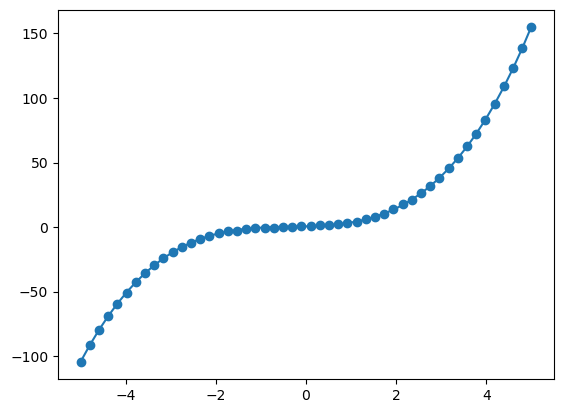

[0.99982244 0.99686823 0.97885244 0.56556441]


In [75]:
x=np.linspace(-5,5,50)
y=x**3+x**2+x+np.random.rand(50)
args=np.polyfit(x,y,3)
f=np.poly1d(args)
y1=f(x)
plt.scatter(x,y)
plt.plot(x,y1)
plt.show()
print(args)

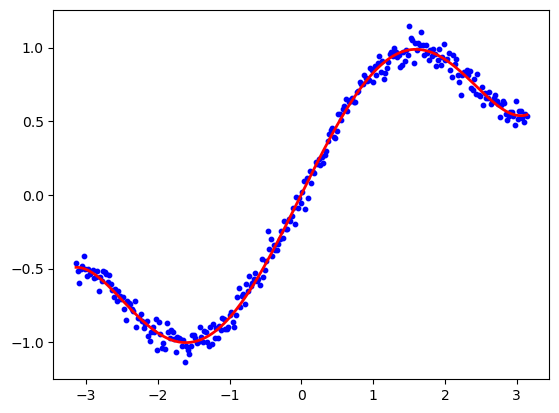

In [76]:
'''利用泰勒展开拟合sinx函数'''
x = np.linspace(-math.pi, math.pi,300)
y=x-(1/(math.factorial(3)))*(x**3)+(1/(math.factorial(5)))*(x**5)+0.05*np.random.randn(len(x))# 小噪声
args=np.polyfit(x,y,5)
f=np.poly1d(args)
y1=f(x)
plt.scatter(x,y,s=10, color='blue')
plt.plot(x,y1,color='red', linewidth=2)
plt.show()

**广播运算**

In [110]:
'''
广播（broadcasting）指的是不同形状的数组之间的算术运算的执行方式。
'''
arr = np.random.randint(0,13,12).reshape(4,3)
col_means=np.mean(arr,axis=0)
#看一个例子，我们可以通过减去列平均值的方式对数组的每一列进行距平化处理
demeaned=arr-col_means#(4,3)-(3,)--->(4,3)-(1,3)---->(4,3)-(4,3)
print(np.mean(arr,axis=0))
print(arr)

[7.75 3.   6.5 ]
[[ 5  3  9]
 [ 8  4  2]
 [ 9  5  5]
 [ 9  0 10]]


In [111]:
demeaned

array([[-2.75,  0.  ,  2.5 ],
       [ 0.25,  1.  , -4.5 ],
       [ 1.25,  2.  , -1.5 ],
       [ 1.25, -3.  ,  3.5 ]])

In [112]:
#看一个例子，我们可以通过减去行平均值的方式对数组的每一列进行距平化处理
row_means = np.mean(arr,axis=1)
#demeaned =arr-row_means (4,3)-(4,)--->(4,3)-(1,4)---->(4,3)-(4,4)不可广播
row_means=row_means.reshape(4,1)
demeaned =arr-row_means
print(row_means)
print(arr)

[[5.66666667]
 [4.66666667]
 [6.33333333]
 [6.33333333]]
[[ 5  3  9]
 [ 8  4  2]
 [ 9  5  5]
 [ 9  0 10]]


In [113]:
demeaned

array([[-0.66666667, -2.66666667,  3.33333333],
       [ 3.33333333, -0.66666667, -2.66666667],
       [ 2.66666667, -1.33333333, -1.33333333],
       [ 2.66666667, -6.33333333,  3.66666667]])